In [3]:
"""
-----------------------------------------------------------------------------
Transformer using pytorch and numpy
-----------------------------------------------------------------------------
AUTHOR: Soumitra Samanta (soumitra.samanta@gm.rkmvu.ac.in)
-----------------------------------------------------------------------------
Package required:
Numpy: https://numpy.org/
Matplotlib: https://matplotlib.org
-----------------------------------------------------------------------------
"""

import numpy as np
import torch
from torch import Tensor
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary

from typing import Tuple


In [4]:
class self_attention_layer(nn.Module):
    """
    Self attention layer
    """
    
    def __init__(
        self,
        dims_embd: int,
    )->None:
        """
        Self attention class initialization
        
        Inpout:
            - dims_embd (int): Embedding dimension
        """
        
        super().__init__()
        self.dims_embd_ = dims_embd
        ############################################################################
        #                             Your code will be here                       #
        #--------------------------------------------------------------------------#
        self.W_q_ = nn.Linear(dims_embd, dims_embd)
        self.W_k_ = nn.Linear(dims_embd, dims_embd)
        self.W_v_ = nn.Linear(dims_embd, dims_embd)
        
        
        #--------------------------------------------------------------------------#
        #                             End of your code                             #
        ############################################################################
        
    def forward(
        self, 
        x: Tensor 
    )->Tensor:
        """
        Forward pass for the self attention layer
        
        Imput:
            - x (torch tensor): Input data
            
        Output:
        
        """
        
        y = []
        ############################################################################
        #                             Your code will be here                       #
        #--------------------------------------------------------------------------#
        Q=self.W_q_(x)
        K=self.W_k_(x)
        V=self.W_v_(x)

        attn_scores=torch.matmul(Q,K.transpose(-2,-1))/torch.sqrt(torch.tensor(self.dims_embd_))
        attn_scores=F.softmax(attn_scores,dim=-1)
        y=torch.matmul(attn_scores,V)
        
        
        #--------------------------------------------------------------------------#
        #                             End of your code                             #
        ############################################################################
    
        return y
    
class transformer_block_encoder(nn.Module):
    """
    Transformer single block
    """
    
    def __init__(
        self,
        dims_embd: int,
        num_hidden_nodes_ffnn: int = 2048,
        dropout_prob: float = 0.0
    )->None:
        """
        Transformer single block class initialization
        
        Inpout:
            - dims_embd (int):             Embedding dimension
            - num_hidden_nodes_ffnn (int): Number of neurons in the fed-forward layer
            - dropout_prob (float):        Dropout probability in liner layers
        """
        
        super().__init__()
        
        ############################################################################
        #                             Your code will be here                       #
        #--------------------------------------------------------------------------#
        self.attention_ = self_attention_layer(dims_embd)
        
        self.layer_norm1_ = nn.LayerNorm(dims_embd)
        self.layer_norm2_ = nn.LayerNorm(dims_embd)
        
        self.ffnn_ = nn.Sequential(
            nn.Linear(dims_embd, num_hidden_nodes_ffnn),
            nn.ReLU(),
            nn.Linear(num_hidden_nodes_ffnn, dims_embd)
        )
        self.droput_ops_ = nn.Dropout(dropout_prob)
        
        self.dims_embd_ = dims_embd
        self.num_hidden_nodes_ffnn_ = num_hidden_nodes_ffnn
        self.dropout_prob_ = dropout_prob
        
        
        #--------------------------------------------------------------------------#
        #                             End of your code                             #
        ############################################################################
        
    def forward(
        self,
        x: Tensor,
    )->Tensor:
        """
        Forward pass for the transformer block
        
        Imput:
            - x (torch tensor): Input data
            
        Output:
        
        """
        
        ############################################################################
        #                             Your code will be here                       #
        #--------------------------------------------------------------------------#
        attn_out = self.attention_(x)
        x=self.layer_norm1_(x+self.droput_ops_(attn_out))
        ffn_out = self.ffnn_(x)
        x=self.layer_norm2_(x+self.droput_ops_(ffn_out))
    
        #--------------------------------------------------------------------------#
        #                             End of your code                             #
        ############################################################################
        
        return x
        
class transformer_encoder(nn.Module):
    """
    Transformer encoder module
    """
    
    def __init__(
        self,
        dims_embd: int,
        num_hidden_nodes_ffnn: int = 2048,
        dropout_prob: float = 0.0,
        num_layers_encoder: int = 2
    )->None:
        """
        Transformer encoder class initialization
        
        Inpout:
            - dims_embd (int):             Embedding dimension
            - num_hidden_nodes_ffnn (int): Number of neurons in the fed-forward layer
            - dropout_prob (float):        Dropout probability in liner layers
            - num_layers_encoder (int):    Number encoder blocks
        """
        super().__init__()
        
        ############################################################################
        #                             Your code will be here                       #
        #--------------------------------------------------------------------------#
        self.trs_endr_blocks_ = nn.ModuleList(
            [
                transformer_block_encoder(dims_embd, num_hidden_nodes_ffnn, dropout_prob) for _ in range(num_layers_encoder)
            ]
        )
        
        self.num_layers_encoder_ = num_layers_encoder
        
        
        #--------------------------------------------------------------------------#
        #                             End of your code                             #
        ############################################################################
    
    def forward(
        self,
        x: Tensor,
    )->Tensor:
        """
        Forward pass for the transformer encoder
        
        Imput:
            - x (torch tensor): Input data
            
        Output:
        
        """
        
        ############################################################################
        #                             Your code will be here                       #
        #--------------------------------------------------------------------------#
        for layer in self.trs_endr_blocks_:
            x = layer(x)
                    
        #--------------------------------------------------------------------------#
        #                             End of your code                             #
        ############################################################################
        
        return x
    
    
class cross_attention_layer(nn.Module):
    """
    Cross attention layer
    """
    
    def __init__(
        self,
        dims_embd: int,
    )->None:
        """
        Cross attention class initialization
        
        Inpout:
            - dims_embd (int): Embedding dimension
        """
        
        super().__init__()
        
        ############################################################################
        #                             Your code will be here                       #
        #--------------------------------------------------------------------------#
        
        self.W_q_ = nn.Linear(dims_embd, dims_embd)
        self.W_k_ = nn.Linear(dims_embd, dims_embd)
        self.W_v_ = nn.Linear(dims_embd, dims_embd)
        
        self.dims_embd_ = dims_embd
        
        
        #--------------------------------------------------------------------------#
        #                             End of your code                             #
        ############################################################################
        
    def forward(
        self, 
        x: Tensor,
        y: Tensor
    )->Tensor:
        """
        Forward pass for the cross-attention layer
        
        Imput:
            - x (torch tensor): Input encoder data
            - y (torch tensor): Input decoder data
            
        Output:
        
        """
        
        ############################################################################
        #                             Your code will be here                       #
        #--------------------------------------------------------------------------#
        Q=self.W_q_(y)
        K=self.W_k_(x)
        V=self.W_v_(x)

        attn_scores=torch.matmul(Q,K.transpose(-2,-1))/torch.sqrt(torch.tensor(self.dims_embd_))
        attn_weights=F.softmax(attn_scores,dim=-1)
        y=torch.matmul(attn_weights,V)

        
        
        #--------------------------------------------------------------------------#
        #                             End of your code                             #
        ############################################################################
    
        return y
    

class transformer_block_decoder(nn.Module):
    """
    Transformer single decoder block
    """
    
    def __init__(
        self,
        dims_embd: int,
        num_hidden_nodes_ffnn: int = 2048,
        dropout_prob: float = 0.0
    )->None:
        """
        Transformer single block class initialization
        
        Inpout:
            - dims_embd (int):             Embedding dimension
            - num_hidden_nodes_ffnn (int): Number of neurons in the fed-forward layer
            - dropout_prob (float):        Dropout probability in liner layers
        """
        
        super().__init__()
        
        ############################################################################
        #                             Your code will be here                       #
        #--------------------------------------------------------------------------#
        
        self.attention_ = self_attention_layer(dims_embd)
        self.cross_attention_ = cross_attention_layer(dims_embd)
        
        self.layer_norm1_ = nn.LayerNorm(dims_embd)
        self.layer_norm2_ = nn.LayerNorm(dims_embd)
        self.layer_norm3_ = nn.LayerNorm(dims_embd)
        
        self.ffnn_ = nn.Sequential(
            nn.Linear(dims_embd, num_hidden_nodes_ffnn),
            nn.ReLU(),
            nn.Linear(num_hidden_nodes_ffnn, dims_embd)
        )
        self.droput_ops_ = nn.Dropout(dropout_prob)
        
        self.dims_embd_ = dims_embd
        self.num_hidden_nodes_ffnn_ = num_hidden_nodes_ffnn
        self.dropout_prob_ = dropout_prob
        
        #--------------------------------------------------------------------------#
        #                             End of your code                             #
        ############################################################################
        
    def forward(
        self,
        x: Tensor,
        y: Tensor
    )->Tensor:
        """
        Forward pass for the transformer block
        
        Imput:
            - x (torch tensor): Input encoder data
            - y (torch tensor): Input decoder data
            
        Output:
        
        """
        
        ############################################################################
        #                             Your code will be here                       #
        #--------------------------------------------------------------------------#
        self_attn_out = self.attention_(y)
        y=self.layer_norm1_(y+self.droput_ops_(self_attn_out))
        cross_attn_out = self.cross_attention_(x, y)
        y=self.layer_norm2_(y+self.droput_ops_(cross_attn_out))
        ffn_out = self.ffnn_(y)
        y=self.layer_norm3_(y+self.droput_ops_(ffn_out))
        
        
    
        #--------------------------------------------------------------------------#
        #                             End of your code                             #
        ############################################################################
        
        return y
    
    
class transformer_decoder(nn.Module):
    """
    Transformer decoder module
    """
    
    def __init__(
        self,
        dims_embd: int,
        num_hidden_nodes_ffnn: int = 2048,
        dropout_prob: float = 0.0,
        num_layers_decoder: int = 2
    )->None:
        """
        Transformer decoder class initialization
        
        Inpout:
            - dims_embd (int):             Embedding dimension
            - num_hidden_nodes_ffnn (int): Number of neurons in the fed-forward layer
            - dropout_prob (float):        Dropout probability in liner layers
            - num_layers_decoder (int):    Number decoder blocks
        """
        super().__init__()
        
        ############################################################################
        #                             Your code will be here                       #
        #--------------------------------------------------------------------------#
        self.trs_dcdr_blocks_ = nn.ModuleList(
            [
                transformer_block_decoder(dims_embd, num_hidden_nodes_ffnn, dropout_prob) for _ in range(num_layers_decoder)
            ]
        )
        
        self.num_layers_decoder_ = num_layers_decoder
        #--------------------------------------------------------------------------#
        #                             End of your code                             #
        ############################################################################
        
    def forward(
        self,
        x: Tensor,
        y: Tensor
    )->Tensor:
        """
        Forward pass for the transformer encoder
        
        Imput:
            - x (torch tensor): Input encoder data
            - y (torch tensor): Input decoder data
            
        Output:
        
        """
        
        ############################################################################
        #                             Your code will be here                       #
        #--------------------------------------------------------------------------#
        for layer in self.trs_dcdr_blocks_:
            y= layer(x, y)
        
        
        #--------------------------------------------------------------------------#
        #                             End of your code                             #
        ############################################################################
        
        return y
        
       
    
dims_embd = 10
num_data_points = 100
batch_size = 5
num_hidden_nodes_ffnn = 1024
dropout_prob = 0.2
num_layers_encoder = 2

x = torch.rand(batch_size, num_data_points, dims_embd)
y = torch.rand(batch_size, num_data_points, dims_embd)

# Test Self-attention layer and its input output size  
print('='*70)
model_self_attention_layer = self_attention_layer(dims_embd)
print('Self-attention layer models is: \n{}' .format(model_self_attention_layer))
print('-'*70)

y_bar = model_self_attention_layer(x)
print('Self-attention layer input size: {}' .format(x.shape))
print('Self-attention layer output size: {}' .format(y_bar.shape))
print('-'*70)
        
# Test Transformer encoder block input output size 
print('='*70)
model_transformer_block_encoder = transformer_block_encoder(dims_embd, num_hidden_nodes_ffnn, dropout_prob)
print('Transformer block models is: \n{}' .format(model_transformer_block_encoder))
print('-'*70)
print('Transformer block models summary:')
print('-'*70)
summary(model_transformer_block_encoder, (num_data_points, dims_embd, ), device=str("cpu"))
print('-'*70)

y_bar = model_transformer_block_encoder(x)
print('Transformer block input size: {}' .format(x.shape))
print('Transformer block output size: {}' .format(y_bar.shape))  
print('-'*70)

# Test Transformer encoder input output size 
print('='*70)
model_transformer_encoder = transformer_encoder(dims_embd, num_hidden_nodes_ffnn, dropout_prob, num_layers_encoder)
print('Transformer encoder models is: \n{}' .format(model_transformer_encoder))
print('-'*70)
print('Transformer encoder models summary:')
print('-'*70)
summary(model_transformer_encoder, (num_data_points, dims_embd, ), device=str("cpu"))
print('-'*70)

y_bar = model_transformer_encoder(x)
print('Transformer encoder input size: {}' .format(x.shape))
print('Transformer encoder output size: {}' .format(y_bar.shape))  
print('-'*70)

# Test Cross-attention layer and its input output size  
print('='*70)
model_cross_attention_layer = cross_attention_layer(dims_embd)
print('Cross-attention layer models is: \n{}' .format(model_cross_attention_layer))
print('-'*70)

y_bar = model_cross_attention_layer(x, y)
print('Cross-attention layer input size: {}' .format(x.shape))
print('Cross-attention layer output size: {}' .format(y_bar.shape))
print('-'*70)

# Test Transformer decoder block input output size 
print('='*70)
model_transformer_block_decoder = transformer_block_decoder(dims_embd, num_hidden_nodes_ffnn, dropout_prob)
print('Transformer decoder block models is: \n{}' .format(model_transformer_block_decoder))
print('-'*70)
print('Transformer decoder block models summary:')
print('-'*70)
summary(model_transformer_block_decoder, [(num_data_points, dims_embd, ), (num_data_points, dims_embd, )], device=str("cpu"))
print('-'*70)

y_bar = model_transformer_block_decoder(x, y)
print('Transformer block input size: {}' .format(x.shape))
print('Transformer block output size: {}' .format(y_bar.shape))  
print('-'*70)

# Test Transformer decoder input output size 
print('='*70)
model_transformer_decoder = transformer_decoder(dims_embd, num_hidden_nodes_ffnn, dropout_prob, num_layers_encoder)
print('Transformer decoder models is: \n{}' .format(model_transformer_decoder))
print('-'*70)
print('Transformer decoder models summary:')
print('-'*70)
summary(model_transformer_decoder, [(num_data_points, dims_embd, ), (num_data_points, dims_embd, )], device=str("cpu"))
print('-'*70)

y_bar = model_transformer_decoder(x, y)
print('Transformer decoder input size: {}' .format(x.shape))
print('Transformer decoder output size: {}' .format(y_bar.shape))  
print('-'*70)
        
        
        
        

Self-attention layer models is: 
self_attention_layer(
  (W_q_): Linear(in_features=10, out_features=10, bias=True)
  (W_k_): Linear(in_features=10, out_features=10, bias=True)
  (W_v_): Linear(in_features=10, out_features=10, bias=True)
)
----------------------------------------------------------------------
Self-attention layer input size: torch.Size([5, 100, 10])
Self-attention layer output size: torch.Size([5, 100, 10])
----------------------------------------------------------------------
Transformer block models is: 
transformer_block_encoder(
  (attention_): self_attention_layer(
    (W_q_): Linear(in_features=10, out_features=10, bias=True)
    (W_k_): Linear(in_features=10, out_features=10, bias=True)
    (W_v_): Linear(in_features=10, out_features=10, bias=True)
  )
  (layer_norm1_): LayerNorm((10,), eps=1e-05, elementwise_affine=True)
  (layer_norm2_): LayerNorm((10,), eps=1e-05, elementwise_affine=True)
  (ffnn_): Sequential(
    (0): Linear(in_features=10, out_features=102

## **Language Translation**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from tqdm import tqdm
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [7]:
en_path="./bn-en.txt/OpenSubtitles.bn-en.en"
bn_path="./bn-en.txt/OpenSubtitles.bn-en.bn"
with open(en_path, 'r', encoding='utf-8') as f:
    eng=f.read().splitlines()

with open(bn_path,'r', encoding='utf-8') as f:
    ben=f.read().splitlines()

In [8]:
assert len(eng) == len(ben)
df = pd.DataFrame({'english':eng,'bengali':ben})
df = df.dropna()
df.to_csv('./translation.csv', index=False)


In [9]:
length = df['english'].str.len().mean()
print(length)

28.419830051928578


In [10]:
df = pd.read_csv('./translation.csv')
combined_sentences = df['english'].tolist() + df['bengali'].tolist()
with open('./combined.txt', 'w', encoding='utf-8') as f:
    for sentence in combined_sentences:
        f.write(sentence.strip() + '\n')

In [11]:
class Vocab:
    def __init__(self, sentences):
        self.word_to_idx = {'<pad>': 0, '<unk>': 1, '<start>': 2, '<end>': 3}
        self.idx_to_word = {v: k for k, v in self.word_to_idx.items()}
        
        for sent in sentences:
            for word in sent.split():
                if word not in self.word_to_idx:
                    new_idx = len(self.word_to_idx)
                    self.word_to_idx[word] = new_idx
                    self.idx_to_word[new_idx] = word
    
    def size(self):
        return len(self.word_to_idx)
src_vocab = Vocab(eng)
tgt_vocab = Vocab(ben)

def pad_batch(sequences,pad_val=0):
    max_len = max(len(seq) for seq in sequences)
    padded = []
    for seq in sequences:
        padding = torch.full((max_len - len(seq),), pad_val, dtype=seq.dtype)
        padded.append(torch.cat([seq, padding]))
    return torch.stack(padded)

def batch_collator(batch):
    src_batch, tgt_batch = zip(*batch)
    return pad_batch(src_batch), pad_batch(tgt_batch)

In [ ]:
class ParallelDataset(Dataset):
    def __init__(self, src_texts, tgt_texts, src_vocab, tgt_vocab, max_len=75):
        self.src_texts = src_texts
        self.tgt_texts = tgt_texts
        self.src_vocab = src_vocab
        self.tgt_vocab = tgt_vocab
        self.max_len = max_len
    
    def __len__(self):
        return len(self.src_texts)
    
    def __getitem__(self, idx):
        src_tokens = [self.src_vocab.word_to_idx.get(word, 1) 
                     for word in self.src_texts[idx].split()[:self.max_len]]
        tgt_tokens = [self.tgt_vocab.word_to_idx.get(word, 1)
                     for word in self.tgt_texts[idx].split()[:self.max_len]]
        src_tokens = [2] + src_tokens + [3]
        tgt_tokens = [2] + tgt_tokens + [3]
        
        return torch.LongTensor(src_tokens), torch.LongTensor(tgt_tokens)

dataset = ParallelDataset(ben, eng, src_vocab, tgt_vocab)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, collate_fn=batch_collator)


In [ ]:
class Translator(nn.Module):
    def __init__(self,src_vocab_size,tgt_vocab_size,emb_dim=512,dim_fffn=1024,num_layers=2,dropout=0.1):
        super().__init__()
        
        self.src_embed = nn.Embedding(src_vocab_size, emb_dim)
        self.tgt_embed = nn.Embedding(tgt_vocab_size, emb_dim)
        
        self.encoder = transformer_encoder(emb_dim,dim_fffn,dropout,num_layers)        
        self.decoder = transformer_decoder(emb_dim,dim_fffn,dropout,num_layers)        

        
        self.output_layer = nn.Linear(emb_dim, tgt_vocab_size)

    
    def forward(self, src, tgt):
        src_emb = self.src_embed(src)
        tgt_emb = self.tgt_embed(tgt)
        encoded = self.encoder(src_emb)
        decoded = self.decoder(encoded, tgt_emb)
        
        return self.output_layer(decoded)

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model=Translator(src_vocab.size(),tgt_vocab.size()).to(device)
optimizer=torch.optim.Adam(model.parameters())
loss_fn=nn.CrossEntropyLoss(ignore_index=0)



Epoch 1, Avg Loss: 2.5899
Epoch 2, Avg Loss: 2.5807
Epoch 3, Avg Loss: 2.5432
Epoch 4, Avg Loss: 2.5191
Epoch 5, Avg Loss: 2.6004
Epoch 6, Avg Loss: 2.5166
Epoch 7, Avg Loss: 2.3904
Epoch 8, Avg Loss: 2.4849
Epoch 9, Avg Loss: 2.6157
Epoch 10, Avg Loss: 2.5555
Epoch 11, Avg Loss: 2.5108
Epoch 12, Avg Loss: 2.2848
Epoch 13, Avg Loss: 2.2533
Epoch 14, Avg Loss: 2.2230
Epoch 15, Avg Loss: 2.1461
Epoch 16, Avg Loss: 2.1333
Epoch 17, Avg Loss: 2.2824
Epoch 18, Avg Loss: 2.2562
Epoch 19, Avg Loss: 2.2959
Epoch 20, Avg Loss: 2.3495


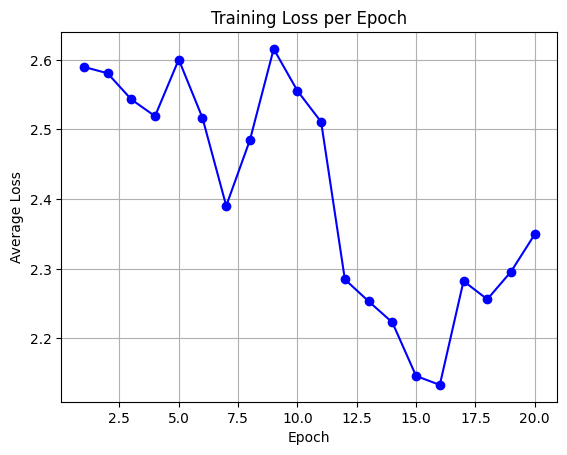

In [ ]:
def train_model(model, dataloader, n_epochs=20):
    model.train()
    epoch_losses=[]

    for epoch in range(n_epochs):
        total_loss=0
        for src, tgt in dataloader:
            src, tgt=src.to(device), tgt.to(device)
            outputs=model(src, tgt[:, :-1])
            loss=loss_fn(outputs.reshape(-1, outputs.size(-1)), tgt[:, 1:].reshape(-1))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            total_loss+=loss.item()
        
        avg_loss=total_loss / len(dataloader)
        epoch_losses.append(avg_loss)
        print(f'Epoch {epoch+1}, Avg Loss: {avg_loss:.4f}')
    
    plt.plot(range(1, n_epochs+1), epoch_losses, marker='o', linestyle='-', color='b')
    plt.xlabel('Epoch')
    plt.ylabel('Average Loss')
    plt.title('Training Loss per Epoch')
    plt.grid(True)
    plt.show()

train_model(model, dataloader)
